# Análisis predictivo de series temporales

----

## Modelos y ejemplos básicos de series temporales

### Instalación de bibliotecas:

In [1]:
## Instalación de astsadata usando pip:
#!pip install astsadata

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy as sp

## Ajusto tamaño de figuras
plt.rcParams['figure.figsize'] = [15,5]
plt.rcParams['axes.grid'] = True

## Pequeño repaso de probabilidad

Un espacio de probabilidad es una terna $(\Omega,\mathcal{A},P)$ donde:
 * $\Omega$ es un conjunto: el *espacio muestral* que representa los resultados de experimentos.
 * $\mathcal{A}$ es una familia de subconjuntos de $\Omega$ a los cuales asignaremos probabilidad, los denominados *eventos*.
 * $P$ es una *medida de probabilidad*, es decir cumple:
 
   a. $P(\Omega) = 1$
   
   b. $P\left( \bigcup_n A_n \right) = \sum_n P(A_n)$, si los eventos $A_n\in \mathcal{A}$ son disjuntos.
   

La medida de probabilidad representa *todo nuestro conocimiento previo* del modelo sobre lo que puede pasar en los experimentos.



### Propiedades usuales

Las medidas de probabilidad cumplen todas las propiedades lógicas que uno espera:

 * $P(\emptyset) = 0$.
 * $P(A^c) = 1 - P(A)$.
 * Si $A\subset B$, $P(A)\leqslant P(B)$.
 * $P(A\cup B) = P(A) + P(B) - P(A\cap B)$

**Probabilidad condicional:**

Es cuando queremos redefinir la probabilidad sabiendo que ya ocurrió un evento antes. Esto es, si sabemos que ocurrió el evento $A$ (nueva información), ¿cúal es la chance e observar $B$ también? Se define como:

$$P(B \mid A) = \frac{P(A\cap B)}{P(A)}.$$

### Variable aleatoria

En general, uno está interesado en los *resultados numéricos* de un experimento. Eso lleva a la definición del concepto de *variable aleatoria*. Una v.a. $X$ es una función (medible) $X:\Omega\to\mathbb{R}$, que de cada experimento extrae un valor numérico.

**Ejemplos:**

 * Exp: tirar una moneda. $X=1$ si sale cara, $X=0$ si sale cruz (v.a. discreta).
 * Exp: tirar un dado. $X=$ no. que sale (v.a. discreta).
 * Exp: elegir una persona al azar de una población, $X=$ altura de la persona. $Y=$ peso de la persona (v.a. continuas).
 * Exp: observar el mercado cambiario, $X_{t}=$ valor del dólar en tiempo $t$. $t$ representa cada día (v.a. continuas, una sucesión de ellas).
 
**Observación:**

En el ejemplo de las personas, $X$ e $Y$ vinculan a la misma persona, por lo que los resultados no deberían ser "independientes".
 

### Densidad y distribución

Una v.a. $X$ queda caracterizada por su *función de distribución acumulada* $F(x)$ definida como:

$$F(x) = P(X\leqslant x) \quad \forall x\in \mathbb{R}.$$

En el caso continuo, en general es más intuitivo trabajar con la *densidad de probabilidad* $f(x)$. $f$ es la densidad de $X$ si:

$$P(X\in(a,b)) = \int_a^b f(x) dx \quad \forall a,b \in \mathbb{R}, a<b.$$

En particular:

$$F(x) = \int_{-\infty}^x f(y)dy, \quad \quad f(x) = \frac{d}{dx} F(x),$$

siempre que la distribución sea continua.

#### Ejemplo: Distirbución normal

$$f(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

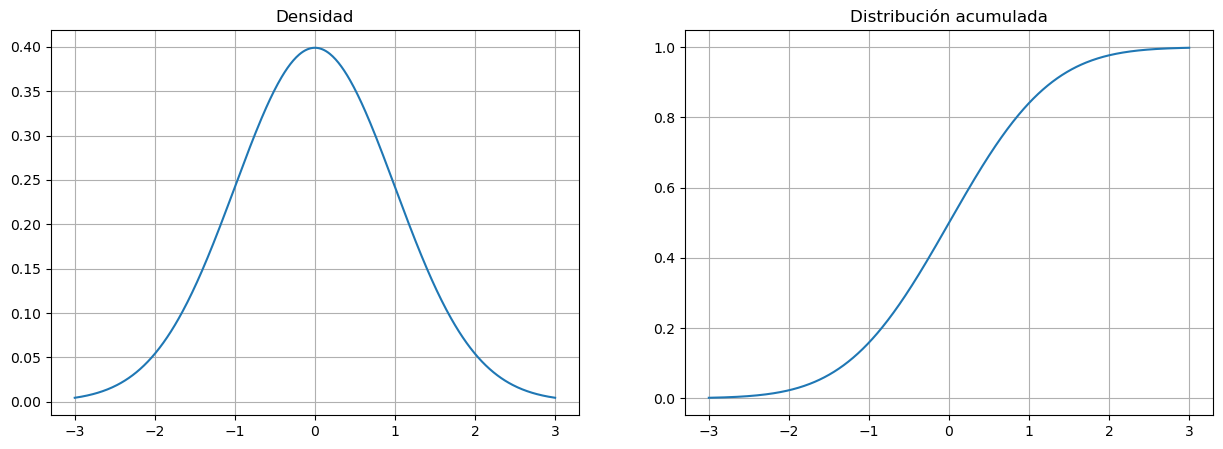

In [16]:
x = np.linspace(-3, 3, 500)

plt.subplot(1, 2, 1)
plt.plot(x, stats.norm.pdf(x))
plt.title("Densidad")
plt.subplot(1,2,2)
plt.plot(x, stats.norm.cdf(x))
plt.title("Distribución acumulada");

### Histograma

Si uno tiene un conjunto de datos $x_1,\ldots,x_n$ que son "realizaciones" de una cierta v.a. $X$, el histograma es un estimador de la densidad de la misma.

El histograma se construye:
 
 * Partiendo el recorrido de la variable en intervalos.
 * Calculando la frecuencia de puntos observados en la muestra en cada intervalo.
 * Se realiza un gráfico de barras con el resultado.
 
Si además, normalizamos la altura de las barras para que el área total sea $1$, se vuelve un estimador de la densidad.

#### Ejemplo: Distribución normal

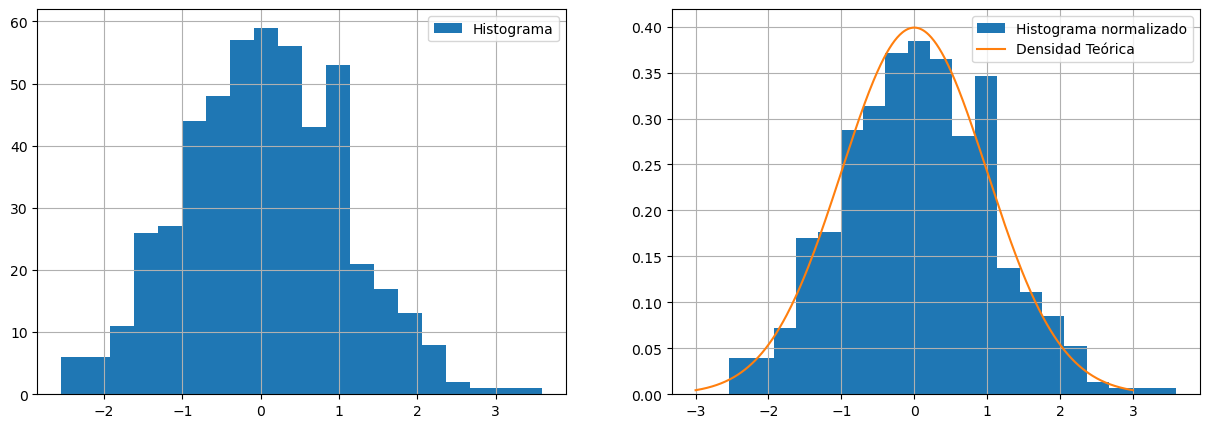

In [17]:
X = np.random.normal(size=500)

plt.subplot(1, 2, 1)
plt.hist(X, bins=20, label="Histograma")
plt.legend()
plt.subplot(1,2,2)
plt.hist(X,bins=20, density=True, label="Histograma normalizado")
plt.plot(x, stats.norm.pdf(x), label="Densidad Teórica")
plt.legend();

#### Ejemplo: Distribución exponencial

$$f(x) = \lambda e^{-\lambda x}$$

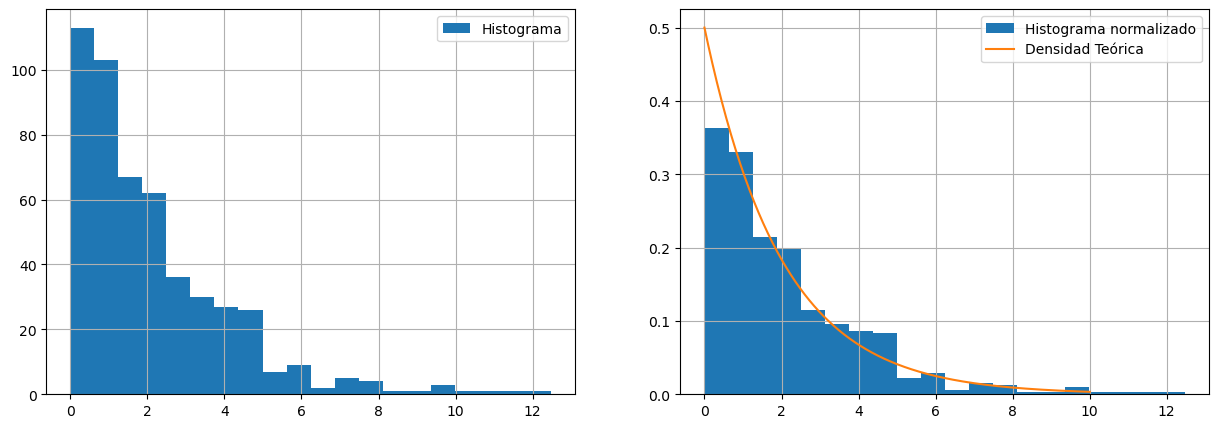

In [18]:
#Sorteo 500 realizaciones de una exponencial de media theta
theta = 2
X = np.random.exponential(scale=theta, size=500)

plt.subplot(1, 2, 1)
plt.hist(X, bins=20, label="Histograma")
plt.legend()
plt.subplot(1,2,2)
plt.hist(X,bins=20, density=True, label="Histograma normalizado")
x=np.linspace(0,10,500)
plt.plot(x, (1/theta)*np.exp(-x/theta), label="Densidad Teórica")
plt.legend();

#### Ejemplo: distribución lognormal

$$X \sim \textrm{lognormal}(\mu,\sigma^2)  \Leftrightarrow \log(X) \sim N(\mu,\sigma^2)$$

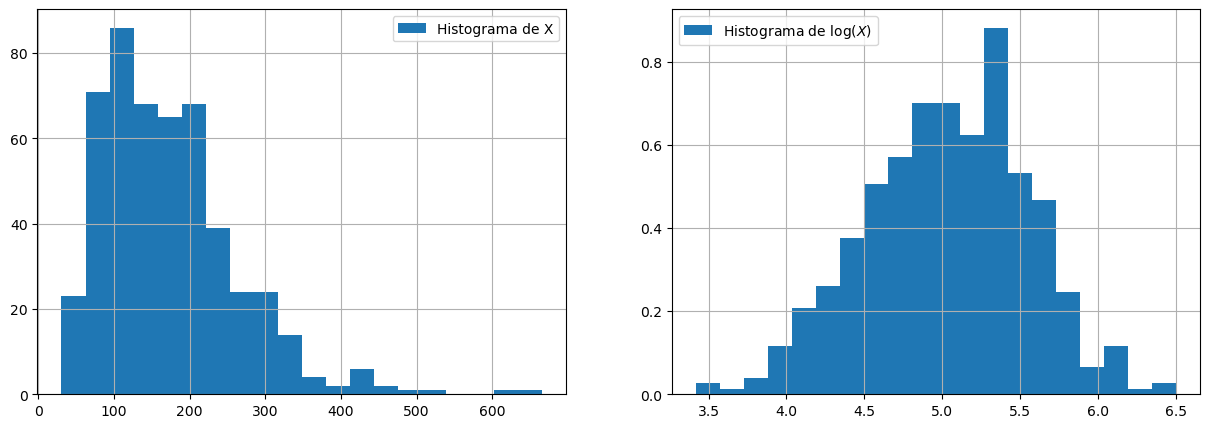

In [19]:
X = np.random.lognormal(mean=5.0, sigma=.5, size=500)

plt.subplot(1, 2, 1)
plt.hist(X, bins=20, label="Histograma de X")
plt.legend()
plt.subplot(1,2,2)
plt.hist(np.log(X),bins=20, density=True, label=r"Histograma de $\log(X)$")
plt.legend();

### Esperanza de una variable aleatoria

La *esperanza* o *media* de una variable aleatoria es una medida del "centro" o "promedio" de la misma. Se define en el caso continuo como:

$$E[X] = \int_{-\infty}^\infty x f(x) dx.$$

Más en general, para cualquier función $g:\mathbb{R}\to\mathbb{R}$, si $X$ es una v.a., entonces $Y=g(X)$ es una nueva v.a. cuya media es:

$$E[Y] = E[g(X)] =  \int_{-\infty}^\infty g(x) f(x) dx$$

**Ejemplos:**
 * Si $X\sim N(\mu,\sigma^2)$, entonces $E[X] = \mu$.
 * Si $X\sim \exp(\lambda)$, entonces $E[X] = 1/\lambda$.
 * Si $X\sim \mathrm{lognormal}(\mu,\sigma^2)$, entonces $E[X] = e^{\mu+\frac{\sigma^2}{2}}$.

### Relación con el promedio de datos

La *ley de grandes números* dice que si tengo una muestra de datos $x_1,\ldots,x_n$ obtenidos de manera independiente de una v.a. $X$, entonces se verifica:

$$\lim_{n\to\infty} \frac{1}{n}\sum_{i=1}^n x_i = E[X] \quad \text{con probabilidad }1.$$

Es decir, para cualquier muestra que podamos sortear en la práctica, el promedio de los datos converge a la esperanza.

**Nota:** Esta ley vale a veces para promedios de variables *dependientes* también.

#### Ejemplo

$X\sim N(10,100)$

In [20]:
X = np.random.normal(size=10000,loc=10,scale=10) #sorteo 10000 muestras. Atención: R recibe mu y sigma no mu y sigma^2

for n in (10,20,50,100,1000,5000,10000):
    print("Para n =",n,"\tel promedio es: ",np.mean(X[0:n]))

Para n = 10 	el promedio es:  6.8788919603104475
Para n = 20 	el promedio es:  6.2934341940391985
Para n = 50 	el promedio es:  8.210427453615635
Para n = 100 	el promedio es:  9.037168592168632
Para n = 1000 	el promedio es:  10.035980569258554
Para n = 5000 	el promedio es:  9.893885533663298
Para n = 10000 	el promedio es:  9.969568428361644


### Varianza de una variable aleatoria

La *varianza* es en cambio una medida de la *dispersión* de los resultados de la v.a. alrededor de su media. A mayor varianza, más "variabilidad" podemos esperar en los sorteos.

$$\mathrm{Var}(X) = E\left[ (X-E[X])^2 \right] = E[X^2] - (E[X])^2.$$

A la varianza se le denota en general por $\sigma^2$, y a su raíz $\sigma$ se le denomina *desvío estándar*.

**Ejemplo:** Si $X\sim N(\mu,\sigma^2)$ precisamente $\sigma^2$ es la varianza de la distribución. En este caso es uno de los parámetros. En el caso gaussiano (y solo en este caso!), la mayor parte (95%) de las muestras se concentran a $\pm 2\sigma$ de la media.

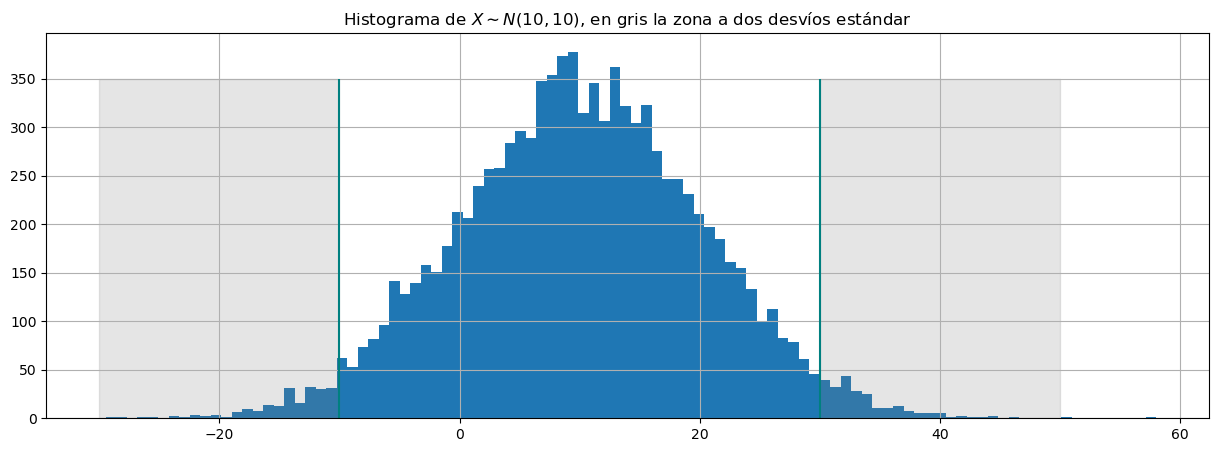

In [21]:
mu=10
sigma = 10
X = np.random.normal(size=10000,loc=mu,scale=sigma) #sorteo 10000 muestras.

plt.hist(X, bins = 100);
plt.vlines([mu-2*sigma,mu+2*sigma], ymin=0, ymax=350, color="teal")
plt.fill_between([mu+2*sigma,mu+4*sigma],0,350, alpha=0.2, color="gray")
plt.fill_between([mu-4*sigma,mu-2*sigma],0,350, alpha=0.2, color="gray")
plt.title(r"Histograma de $X\sim N(10,10)$, en gris la zona a dos desvíos estándar");

#### Estimación de la varianza

Así como el promedio converge a la esperanza, podemos usar la ley de grandes números nuevamente para estimar la varianza y el desvío estándar a partir de una muestra $x_1,\ldots,x_n$ mediante la siguiente cuenta:

$$\sigma_n^2 = \frac{1}{n} \sum_{i=1}^n (x_i-\bar{x}_n)^2, \quad \quad \sigma_n = \sqrt{\sigma_n^2}.$$

Sin embargo, el mejor estimador (insesgado) para la varianza surge de normalizar por $n-1$ y es lo que generalmente se implementa en software:

$$s_n^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i-\bar{x}_n)^2, \quad \quad s_n = \sqrt{s_n^2}.$$


In [22]:
mu=10
sigma = 10
X = np.random.normal(size=10000,loc=mu,scale=sigma) #sorteo 10000 muestras. Atención: R recibe mu y sigma no mu y sigma^2

print("Varianza estimada s^2_n: ", np.var(X))
print("Desvío estimado s_n: ", np.std(X))

Varianza estimada s^2_n:  100.91251568798124
Desvío estimado s_n:  10.04552217099645


## Definición de serie temporal:

Una *serie temporal* es una sucesión de variables aleatorias o *proceso estocástico* $x_0,x_1,x_2,\ldots$. La variable aleatoria $x_t$ denota el valor del proceso al tiempo $t$.

* Al proceso estocástico o serie temporal se lo denota por $\{x_t\}$.

* Típicamente (y para todo este curso) se consideran indexados por $t$ entero ($\ldots, -2, -1, 0, 1, 2, \ldots$) o $t$ entero positivo.

* A los valores particulares que toma una serie temporal cuando la observamos se le denomina *realización* del proceso, y lo denotaremos por $x_t$, abusando un poco de la notación.

### Análisis y predicción en series temporales

 * En general, una serie de datos que obtenemos $x_t$ podemos pensarla como la *realización* de algún proceso estocástico subyacente, el cuál desconocemos.
 
 * Podemos entonces formular un **modelo** para la serie. Por ejemplo, autorregresivo (AR), autorregresivo-media móvil (ARMA), modelos en espacio de estados, etc. etc.
 
 * En base a los datos buscamos ajustar los parámetros de dicho modelo.
 
 * Usando la estructura del modelo tratamos luego de extrapolar a futuro el comportamiento.

### Algunas observaciones básicas:

* Normalmente __graficar__ la evolución de una realización nos da pistas de cómo analizarla.

* A veces las graficaremos como puntos, otras veces como líneas continuas, sobre todo cuando se trata de la realización de algún proceso continuo subyacente (por ejemplo, sismógrafo, sonido en los ejemplos de la introducción). 

* En general series continuas de todos modos se *muestrean* a intervalos discretos, y al analizarlas en un computadora esto es forzosamente así.

* __Observación:__ Elegir el intervalo de muestreo es un arte en sí mismo para capturar la dinámica de la serie.

  * Si queremos observar fenómenos que varían mensualmente, tomar muestras trimestrales no alcanza. Necesitamos mirar "más rápido".
  
  * Quizás tampoco es necesario tomar muestras diarias que introducen fenómenos extra: hay que elegir cuidadosamente la escala.

### Ejemplo 1: Ruido blanco

**Definición:** El caso más sencillo de serie temporal es un conjunto de variables aleatorias con la misma distribución y no correlacionadas. Si ${w_t}$ es una serie temporal en la cual las variables tienen media $E[w_t]=0$, varianza $Var(w_t) = \sigma_w^2 >0$ y la covarianza de $w_t$ y $w_s$ es $0$ se le denomina *ruido blanco*.  

**Definición:** Si además las variables son independientes y con la misma distribución (iid), se le denomina ruido blanco independiente.

**Definición:** En el caso que además la distribución de $w_t$ para cada $t$ sea Normal $N(0,\sigma_w^2)$ le llamamos *ruido blanco gaussiano*

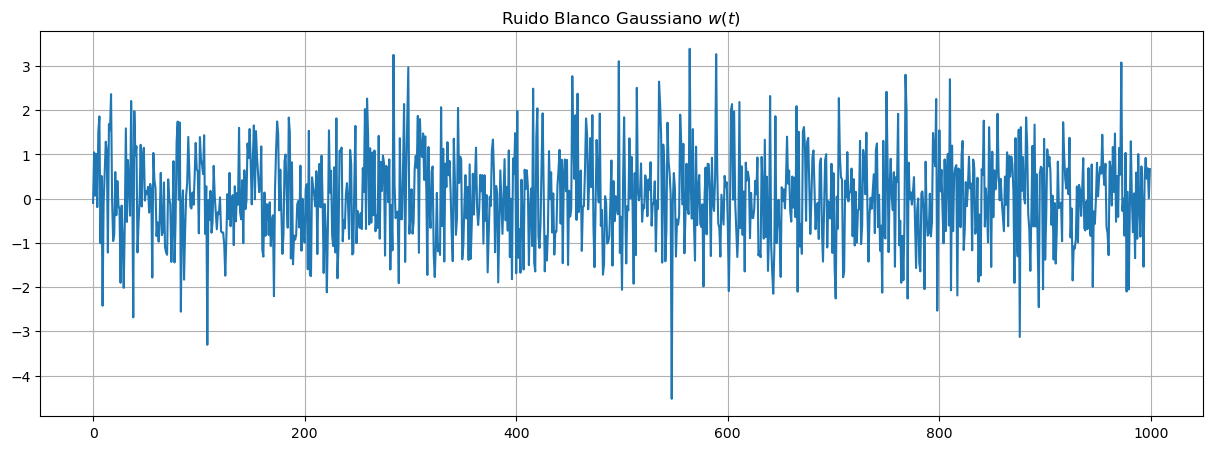

In [23]:
w = np.random.normal(size=1000,loc=0,scale=1)  # 1000 N(0,1) variates
plt.plot(w)
plt.title(r"Ruido Blanco Gaussiano $w(t)$");

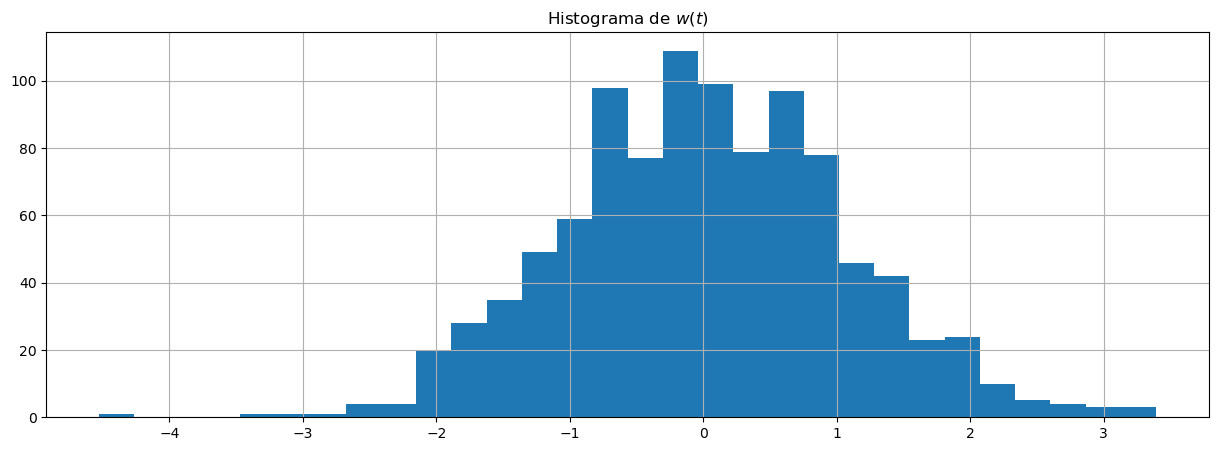

In [24]:
plt.hist(w,bins=30)
plt.title(r"Histograma de $w(t)$");

In [25]:
from IPython.display import Audio

Audio(w, rate=10000)

### Observación:

Como $\mathrm{Var}(a X) = a^2 \mathrm{Var}(x)$, si tenemos ruido blanco de varianza $1$ y lo multiplicamos por $\sigma$, obtendremos ruido blanco de varianza $\sigma^2$:

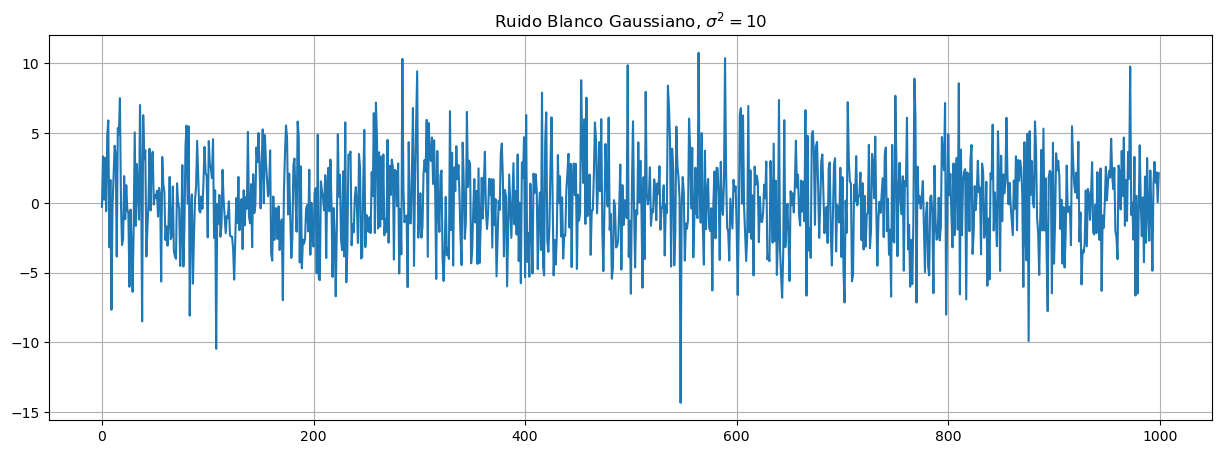

In [26]:
sigma2 = 10
w2 = np.sqrt(sigma2)*w
plt.plot(w2)
plt.title(r"Ruido Blanco Gaussiano, $\sigma^2=10$");

### Ejemplo 2: Media móvil


Considere un proceso de ruido blanco (gaussiano) $w_t$ al que se le aplica la siguiente transformación:

$$ x_t = \frac{1}{3}(w_{t-2} + w_{t-1} + w_{t})$$

Es decir, el valor de $x_t$ es un promedio de los últimos $3$ valores de un ruido blanco. ¿Qué ocurre?

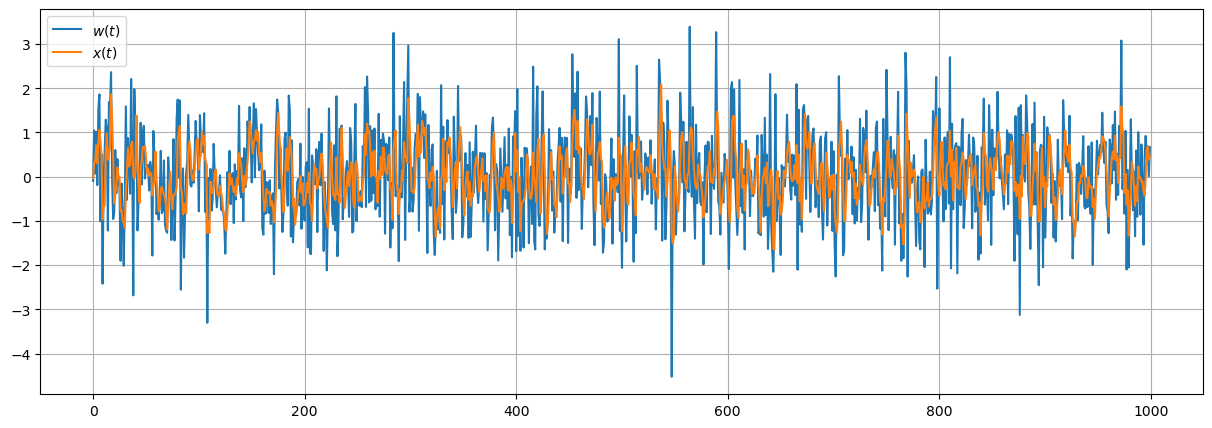

In [29]:
n=3
x = sp.signal.lfilter(1/n*np.ones(n),1,w) #Aplica el filtro de media móvil
plt.plot(w, label=r"$w(t)$")
plt.plot(x, label=r"$x(t)$");
plt.legend();

Text(0.5, 1.0, 'Histograma de $x(t)$')

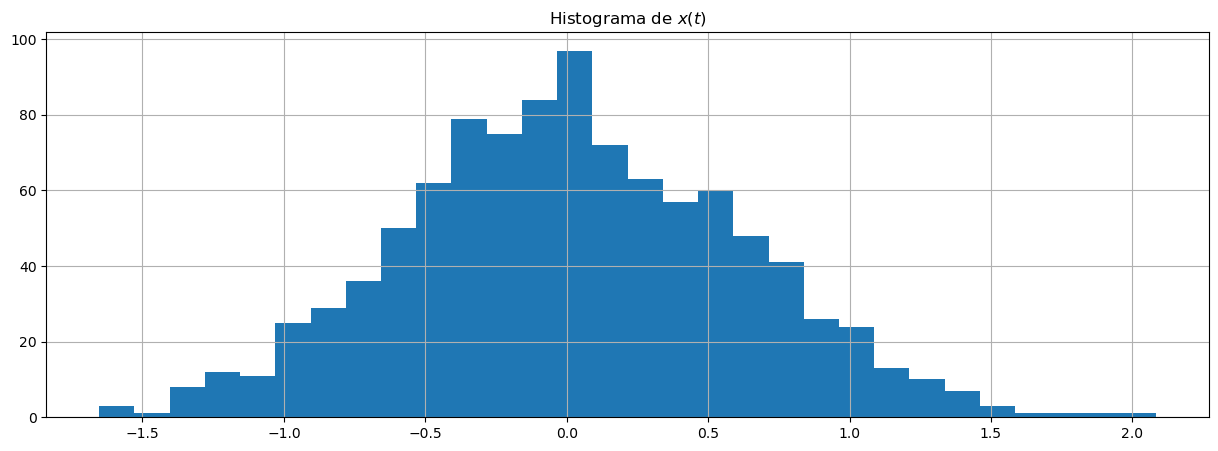

In [30]:
plt.hist(x,bins=30);
plt.title(r"Histograma de $x(t)$")

### Observaciones:

* El proceso $x_t$ es más *suave* que el ruido blanco, y tiene menos variabilidad.

* El promediado elimina las oscilaciones más rápidas, y comienzan a realzarse las lentas.

* Al proceso de tomar ruido blanco (o cualquier señal) y aplicarle una transformación lineal como la anterior se le llama *media móvil* o *filtrado*. De ahí el comando `filter` que se utiliza.

### Media móvil con coeficientes arbitrarios

Lo anterior se puede realizar con coeficientes cualesquiera, cambiando así la estructura del proceso.

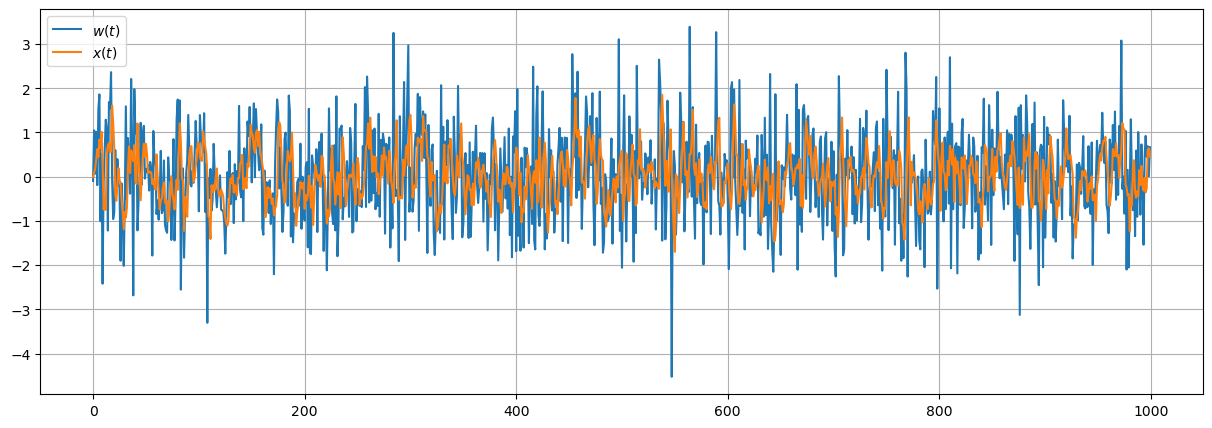

In [31]:
x = sp.signal.lfilter([0.1,0.2,0.3,0.4],1,w) #Aplica el filtro de media móvil
plt.plot(w, label=r"$w(t)$")
plt.plot(x, label=r"$x(t)$");
plt.legend();

### Ejemplo 3: Autorregresiones

Consideremos una serie $x_t$ donde el valor actual *depende explícitamente* de los valores anteriores ponderados, más un término de ruido o *innovación* independiente que ocurre en tiempo $t$.

Más explícitamente, $x_t$ se genera por ejemplo mediante la siguiente ecuación:

$$x_t = 0.9 x_{t-1} + w_t$$

A este proceso se le denomina *autorregresivo* de orden $1$.

Text(0.5, 1.0, 'Autoregresivo (orden 1)')

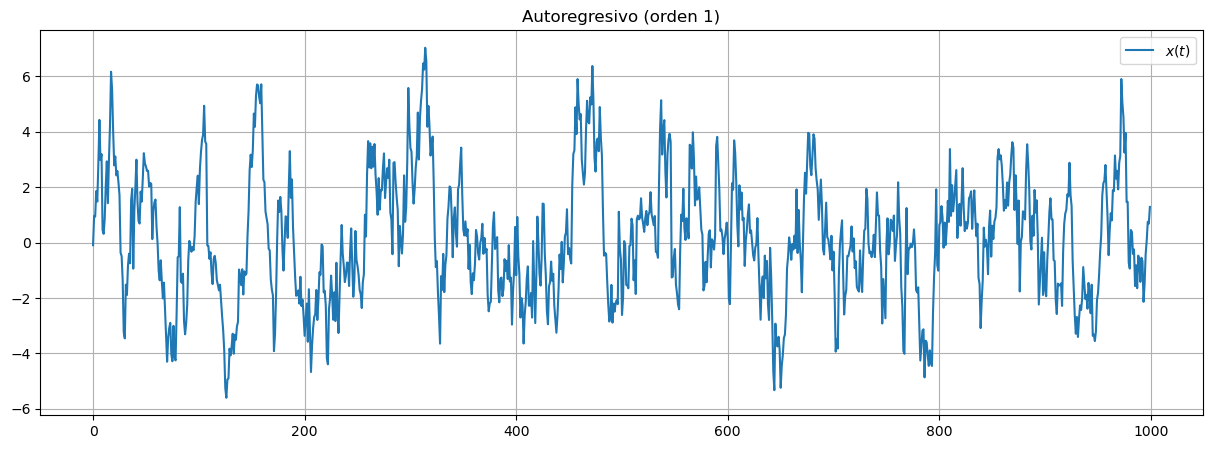

In [32]:
x = sp.signal.lfilter([1],[1,-.9],w) #Aplica el filtro autorregresivo. Más adelante veremos su uso.
plt.plot(x, label=r"$x(t)$");
plt.legend();
plt.title("Autoregresivo (orden 1)")

### Observaciones:

* El proceso $x_t$ presenta *inercia*, producto de la dependencia con los valores anteriores en el tiempo.

* Observemos que tenemos que definir la condición inicial de la serie ($x_0$, suele suponerse $0$).


### Autorregresiones en general

El procedimiento anterior permite generar procesos sumamente ricos en su estructura. A mode de ejemplo, consideremos una serie $x_t$ que se genera a partir de ruido blanco $w_t$ mediante la siguiente ecuación:

$$ x_t = x_{t-1} - 0.9 x_{t-2} + w_t.$$

Este es un ejemplo de proceso *autorregresivo* de orden $2$.

* **Observación:** aquí se requieren dos condiciones iniciales, $x_0$ y $x_1$. 

Text(0.5, 1.0, 'Autoregresivo (orden 2)')

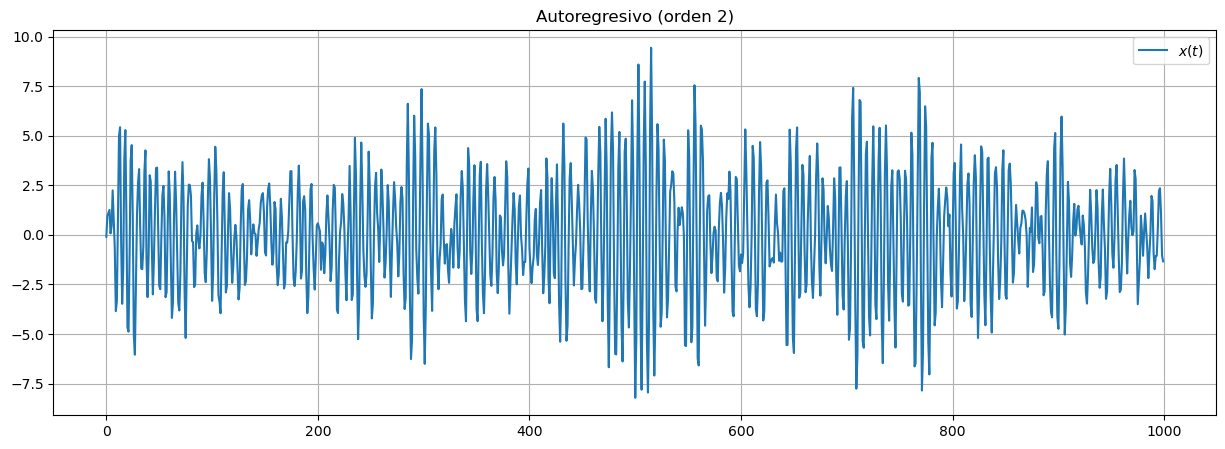

In [33]:
x = sp.signal.lfilter([1],[1,-1,.9],w) #Aplica el filtro autorregresivo.
plt.plot(x, label=r"$x(t)$");
plt.legend();
plt.title(r"Autoregresivo (orden 2)")

### Observaciones:

* En este caso, el proceso $x_t$ presenta *oscilaciones*, producto de la estructura de dependencia con los valores anteriores.

* Pruebe cambiar los coeficientes para ver los posibles comportamientos.

### Ejemplo 4: Paseo al azar con deriva.

Consideremos una señal $x_t$ que se genera a partir de ruido blanco $w_t$ mediante la siguiente ecuación:

$$ x_t = \delta + x_{t-1} + w_t.$$

Es un paseo al azar con deriva: $\delta$ es la magnitud de la deriva. Observemos que el proceso va acumulando los ruidos anteriores. 

$$ x_t = \delta + x_{t-1} + w_t = \delta + (\delta + x_{t-2}+w_{t-1}) + w_t = 2\delta + w_{t-1} + w_t$$

y así sucesivamente.

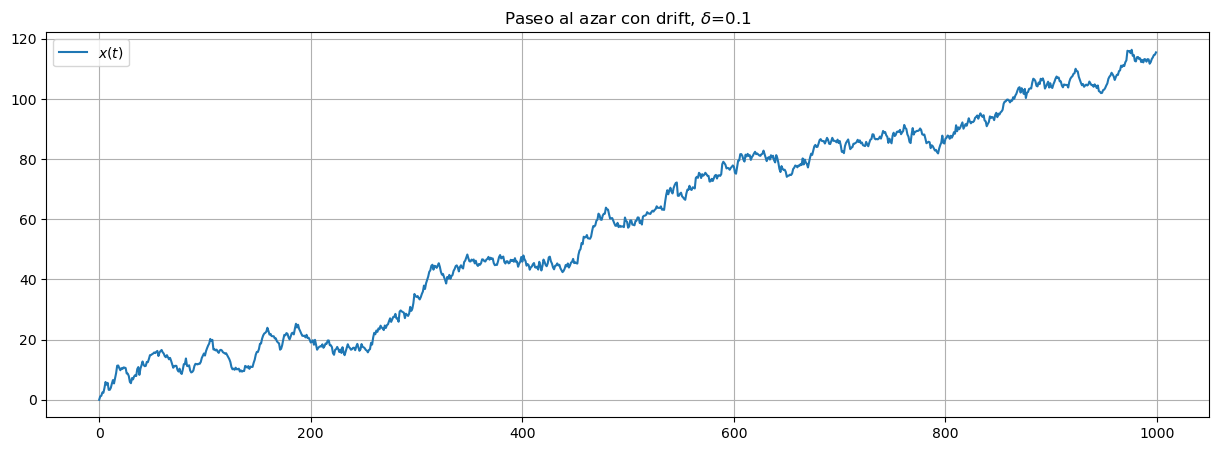

In [34]:
delta = 0.1  #Valor de deriva
x = np.cumsum(w+delta)  #np.cumsum() acumula los valores progresivamente.

plt.plot(x, label=r"$x(t)$");
plt.legend();
plt.title(rf"Paseo al azar con drift, $\delta$={delta}");

### Observaciones:

El proceso no es estacionario!

 * Si la deriva es distinta de 0, esto es obvio. El valor medio de la señal va creciendo (o decreciendo) indefinidamente.
 
 * Si la deriva es 0, de todos modos la varianza va aumentando a medida que acumulamos más y más instancias del ruido.
 
 * Para ver esto último, simulemos varias realizaciones del proceso en el caso $\delta=0$.
 

[]

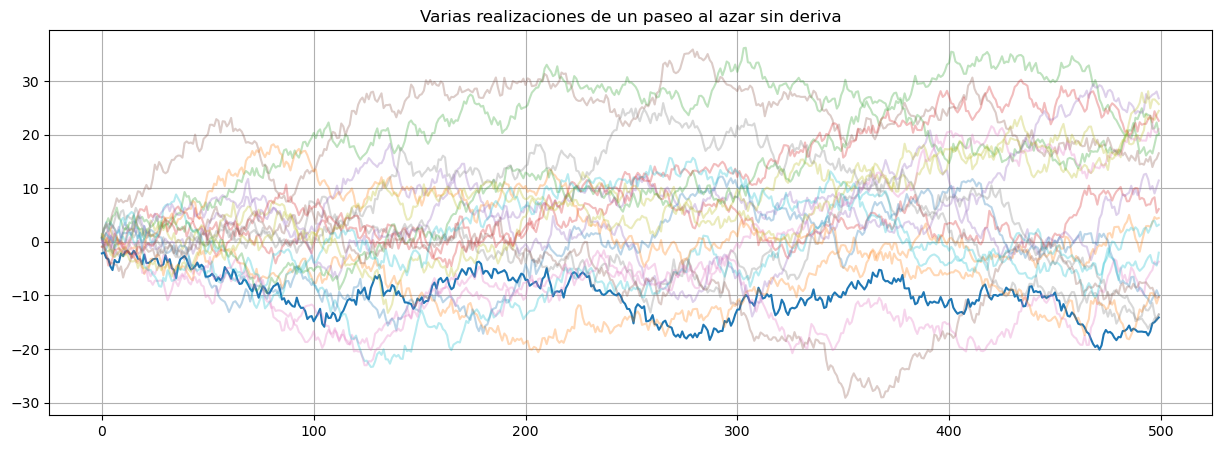

In [35]:
#Paseo al azar sin deriva
w = np.random.normal(size=500,loc=0,scale=1)
x = np.cumsum(w)

plt.plot(x)
plt.title("Varias realizaciones de un paseo al azar sin deriva")

#agrego mas realizaciones
for i in range(1,20):
    w = np.random.normal(size=500,loc=0,scale=1)
    x = np.cumsum(w)
    plt.plot(x,alpha=0.3)

plt.plot(ylims=(-10,10))

### Incrementos de un paseo al azar

Si consideramos los *incrementos* del proceso, estos sí son estacionarios:

$$y_t = x_t - x_{t-1} = \delta + x_{t-1} + w_t - x_{t-1} = \delta + w_t$$

Es decir, si aplicamos la transformación $x_t \mapsto y_t = x_t - x_{t-1} = \nabla x_t$, obtenemos ruido blanco (más una media $\delta$ que marca la tendencia).

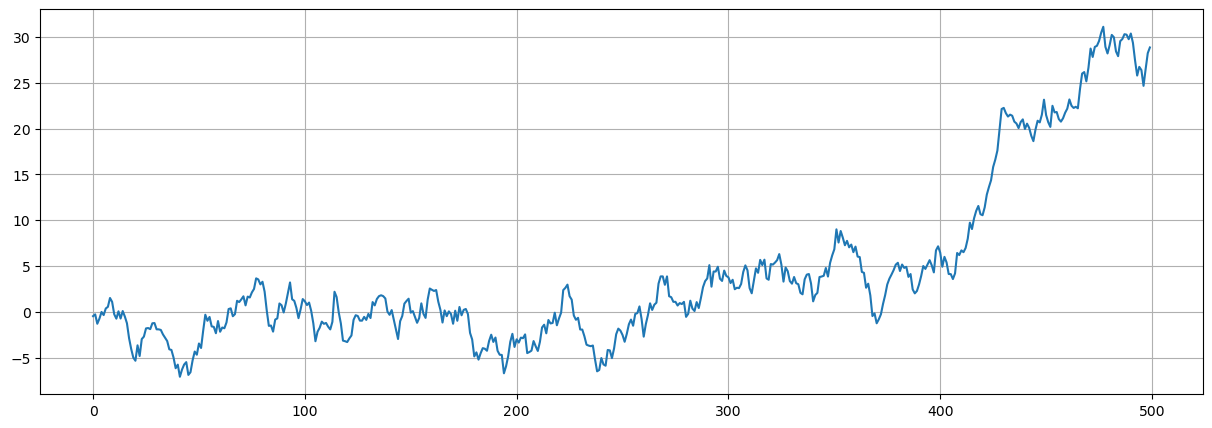

In [36]:
w = np.random.normal(size=500,loc=0,scale=1)
delta=0.1
x = np.cumsum(w+delta)
plt.plot(x)

0.05876818850163211

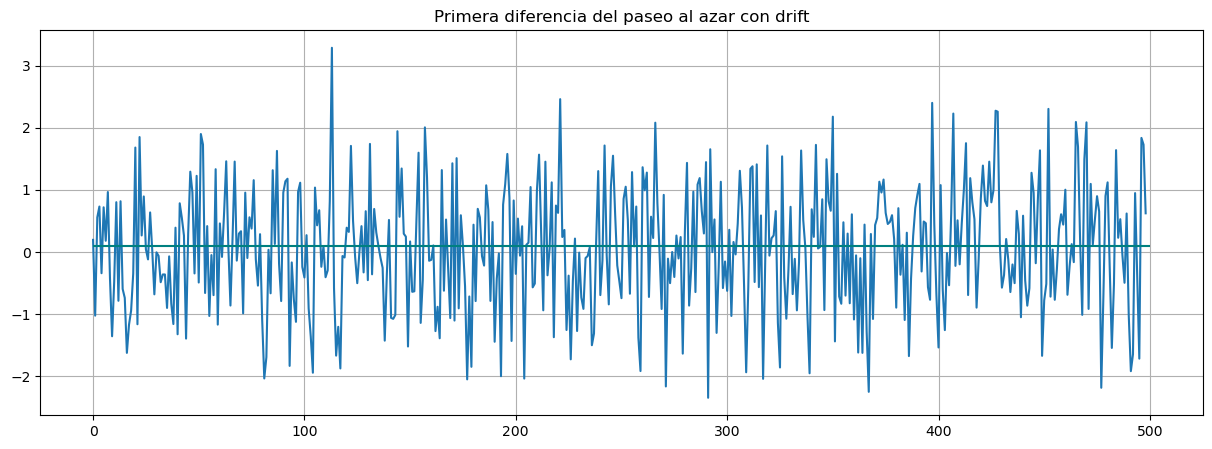

In [37]:
y = np.diff(x)  #el comando diff aplica la transformación

plt.plot(y)
plt.title("Primera diferencia del paseo al azar con drift")
plt.hlines(delta,0,500, color="teal")
np.mean(y)

### Ejemplo 5: Señal y ruido

Se tiene la señal:

$$ x_t = s_t + w_t$$

Siendo $s_t$ la siguiente:

$$s_t = 2\cos\left(2\pi\frac{t+15}{50}\right).$$

Aquí:

 * El $2$ multiplicando representa la *amplitud* de la señal.
 * El $1/50$ dentro del coseno es la *frecuencia*. En este caso, lleva 50 unidades de tiempo completar un ciclo.
 * El $15$ indica la *fase*, es decir, dónde se encuentran los picos. Como $\cos(2\pi n) = 1$, esta señal tendría un pico en $t=-15$ ($\cos(0)$) y luego cada $50$ unidades, por lo que el primer pico visible está en $t=35$ ($\cos(2\pi)$).

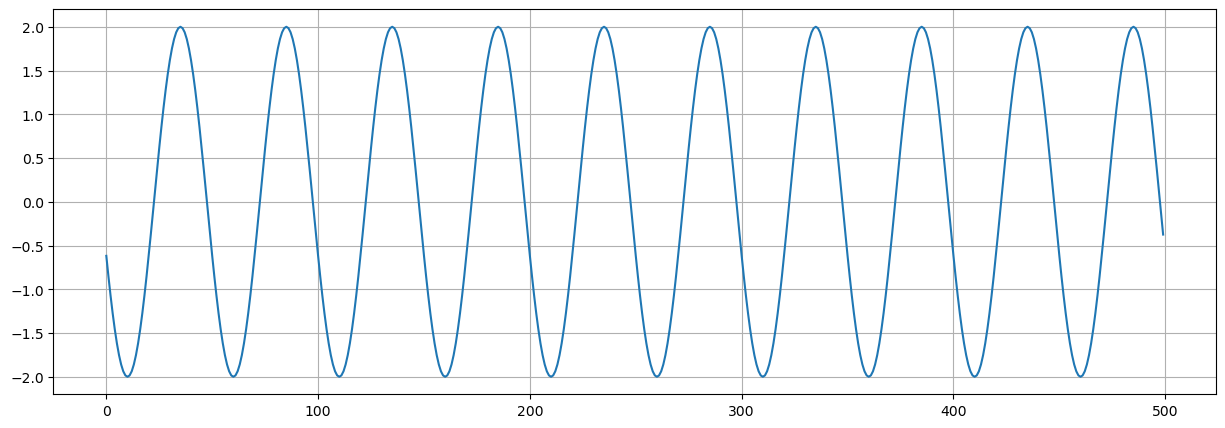

In [39]:
t = np.arange(0,500)
s = 2*np.cos(2*np.pi*(t+15)/50)
plt.plot(s);

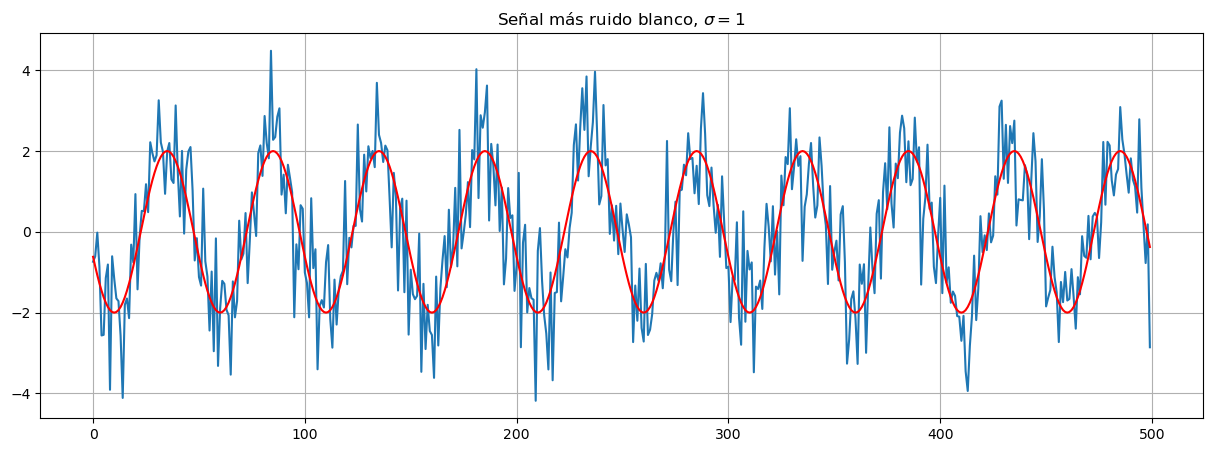

In [40]:
w = np.random.normal(size=500,loc=0,scale=1)
x = s + w
plt.plot(x)
plt.plot(s,color="red")
plt.title(r"Señal más ruido blanco, $\sigma = 1$");

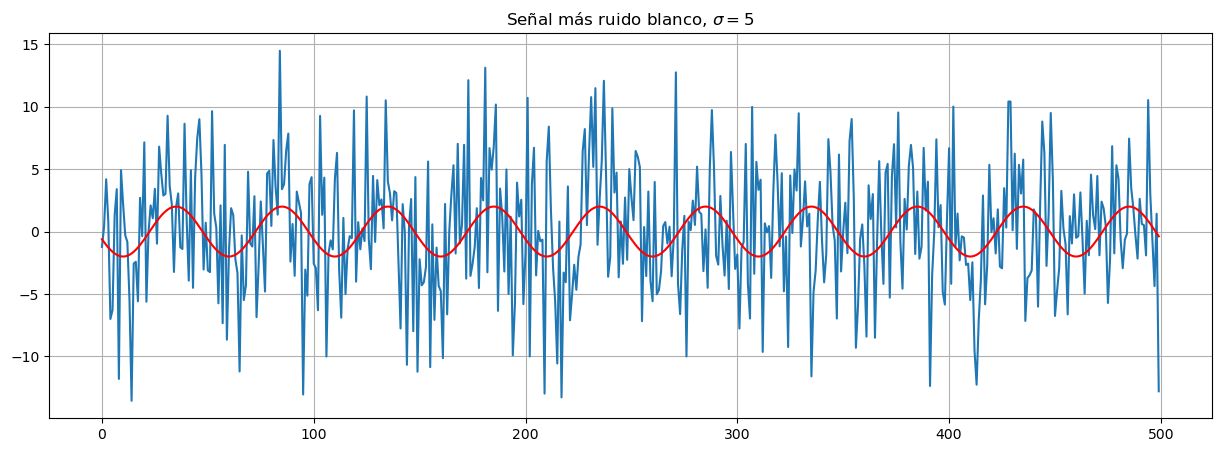

In [41]:
sigma = 5
x = s + sigma*w
plt.plot(x)
plt.plot(s,color="red")
plt.title(rf"Señal más ruido blanco, $\sigma = {sigma}$");

### Observaciones

En este caso, la varianza del ruido determina cuánto podemos recuperar de la señal original. Se habla de "relación señal a ruido". Cuanto más potente el ruido, menos podemos recuperar o identificar la señal original.

### Ejemplo 6: Proceso geométrico

Supongamos que tenemos una magnitud que crece *porcentualmente*. Por ejemplo, en economía, muchas magnitudes crecen un cierto porcentaje de su valor anterior:

$$s_t = (1+\theta)s_{t-1}$$

Por ejemplo, si $\theta=0.05$, crece un $5\%$ por unidad de tiempo.

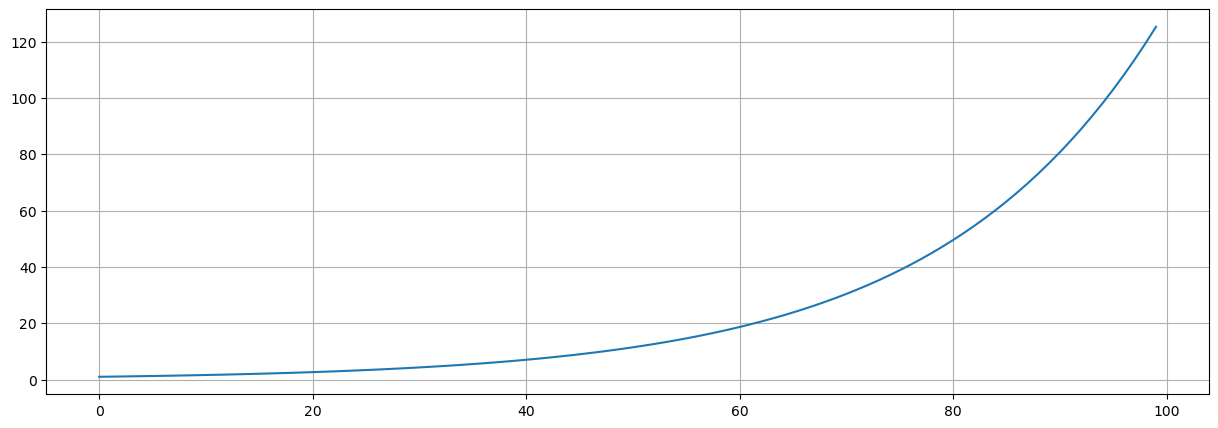

In [43]:
s=np.empty(100); #inicializo array vacío
s[0] = 1 ##inicializo el primer valor
theta = 0.05
for i in range(1,100):
    s[i] = (1+theta)*s[i-1]

plt.plot(s);

En este caso la transformación $s\mapsto \log(s)$ convierte la tendencia en lineal:

$$s'_t = \log(s_t) = \log((1+\theta)s_{t-1}) = \log(1+\theta) + \log(s_{t-1}) = \log(1+\theta) + s'_{t-1}.$$ 

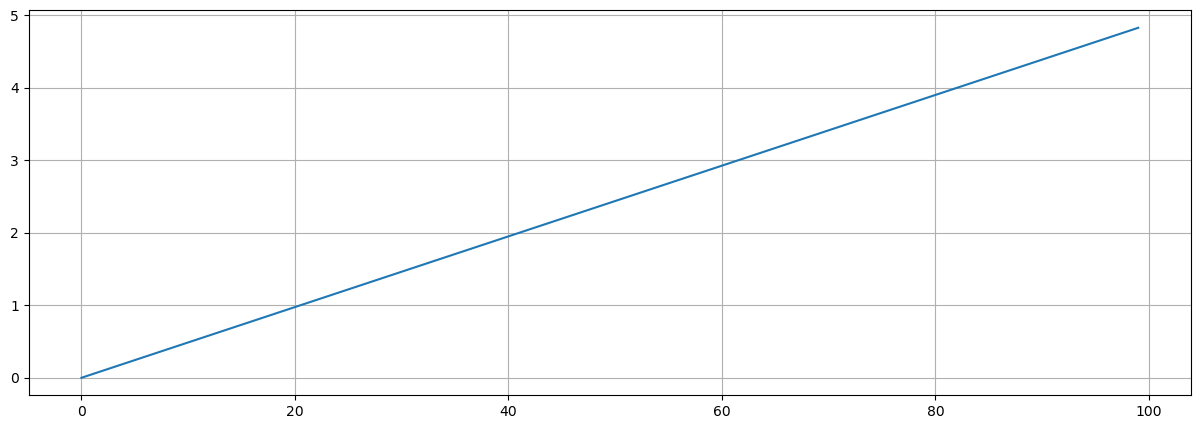

In [44]:
log_s = np.log(s)
plt.plot(log_s);

Supongamos ahora que podemos asumir que existe ruido en el incremento, es decir:

$$x'_t = \log(x_t) = \log(1+\theta) + x'_{t-1} + w_t.$$

con $w_t$ ruido blanco Gaussiano. ¿Cómo se ve este proceso? ¿Cómo se ve el proceso original?

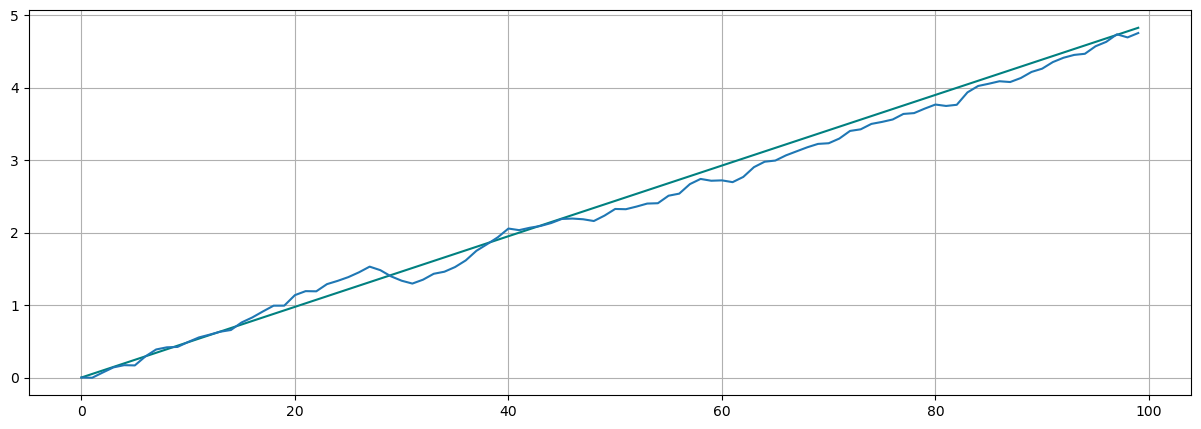

In [45]:
w=np.random.normal(size=100,loc=0,scale=1)
log_x = np.empty(100)
log_x[0] = log_s[0]

for i in range(1,100):
    log_s[i] = np.log(1+theta) + log_s[i-1]
    log_x[i] = np.log(1+theta)  + log_x[i-1] + 0.05*w[i]

plt.plot(log_s, color="teal")
plt.plot(log_x)

El proceso en la escala original se recupera haciendo la transformación inversa al logaritmo, es decir, la exponencial.

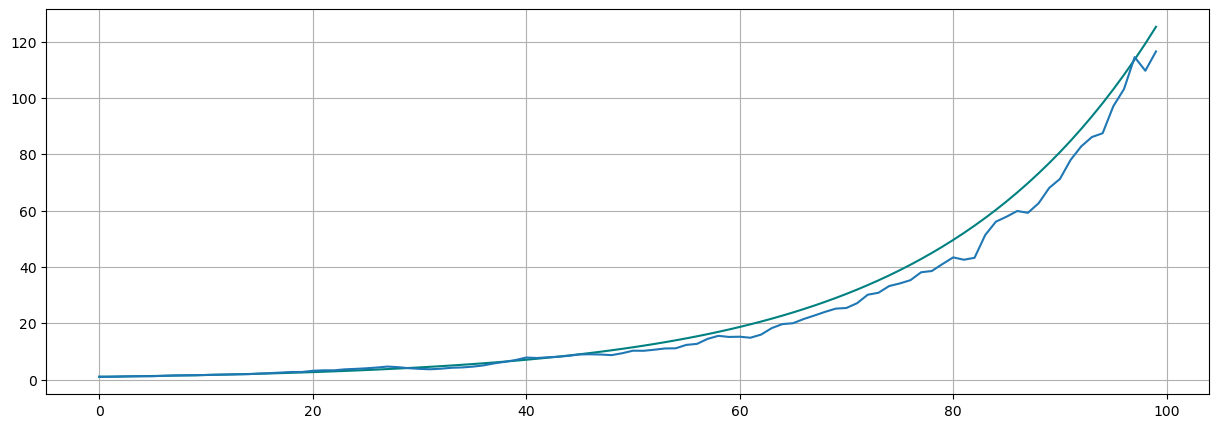

In [46]:
x = np.exp(log_x)

plt.plot(s, color="teal")
plt.plot(x)

## Ejercicio

La idea de este ejercicio es explorar la diferencia entre un paseo al azar y un proceso de media móvil.

1. Generar en una misma figura $10$ realizaciones de largo $n=500$ de un paseo al azar sin drift ($\delta=0$) y varianza $\sigma_w^2=2$. (Ver ejemplo más arriba).

2. Generar en una misma figura $10$ realizaciones de largo $n=500$ del proceso de media móvil del Ejemplo 2.

3. ¿Qué ocurre con la media y la varianza a medida que avanza el tiempo?

## Ejercicio

En la serie de datos `gnp` que está en la biblioteca, se guardan los valores del PBI de EE.UU. por trimestres desde 1947 a 2002.

1. Graficar la serie. ¿A cuál de los modelos anteriores se parece?
2. Calcular el crecimiento porcentual como:

$$x_t = \frac{gnp_{t}-gnp_{t-1}}{gnp_{t-1}}$$
y graficar el resultado.

3. Calcular el crecimiento porcentual aproximado como `x=np.diff(np.log(gnp))`, es decir haciendo la transformación:

$$x_t = \log(gnp_{t}) - \log(gnp_{t-1})$$

4. Graficar ambos y comparar con los modelos vistos anteriormente.

## Ejercicio

1. Considere la serie de datos `jj` de ganancias de Johnson y Johnson. Aplique a la misma el siguiente filtro de media móvil a la serie $x$:

$$v_t = \frac{1}{4}(x_t + x_{t−1} + x_{t−2} + x_{t−3}).$$

Grafique conjuntamente $x_t$ y $v_t$. Comente el comportamiento de $x$ y $v$ y qué ocurre al aplicar el filtro.


2. Repetir la parte anterior para $x_t=\log(jj)$.

3. Discuta los resultados. ¿Qué logra el filtro de media móvil? ¿Cómo lo aplicaría a los datos de Covid-19 que muestran ciclos semanales debido a los diferentes testeos diarios realizados?